# Снижение размерности (Dimensionality Reduction)

In [ ]:
x, y, z -> res_vector = x^2 + y^2 + z^2
data -> hour, minities, year....
_______________________

x1 , x2, .... x100

x1 - x7 -> 0.9

# x, y, z -> res_vector = sqrt(x^2 + y^2 + z^2)

**Снижение размерности — это процесс уменьшения количества признаков (features) в данных при сохранении максимально возможного количества информации.**

____

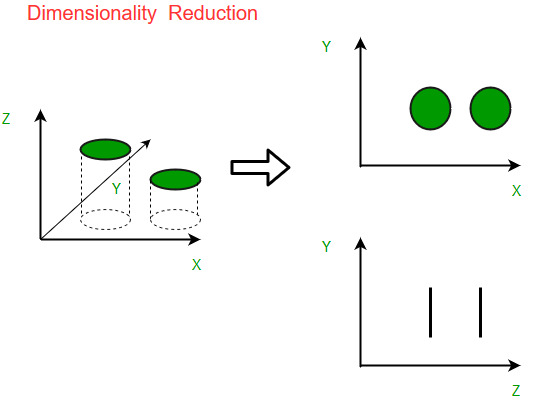

Основой любой задачи машинного обучения являются **данные**. Именно они определяют, насколько эффективно модель сможет находить закономерности, делать прогнозы и принимать решения. Однако на практике мы сталкиваемся с двумя крайностями:
- **данных слишком мало или они неполные**. Это приводит к переобучению, нестабильности модели и низкой обобщающей способности. В таких случаях мы применяем Feature Engineering (отвечает за создание новых признаков) и Feature Selection (отвечает за отбор наиболее значимых признаков);
- **данных слишком много**. Здесь мы сталкиваемся с другой проблемой: большое число признаков (высокая размерность) может замедлять обучение модели, увеличивать потребление памяти и вызывать эффект "проклятия размерности" (curse of dimensionality).

Ранее (в разделе `Feature Selection`) мы говорили о том, как можно бороться с избыточностью данных, отбирая только важные признаки. Что же делать, если все признаки полезны, но их слишком много?

**Почему важно снижение размерности?**

Слишком высокая размерность данных может привести к ряду проблем:
- к "проклятию размерности" (с увеличением количества признаков плотность данных снижается, поэтому модели становится сложно находить закономерности, например, в пространстве из 1000 признаков точки становятся слишком разреженными, как следствие, модель теряет способность к генерализации);
- к высокой вычислительной сложности (обработка данных с тысячами признаков требует больше памяти и времени);
- к появлению коррелирующих признаков (часто в данных есть признаки, которые передают одну и ту же информацию, например, площадь квартиры и количество комнат могут сильно коррелировать);
- к шуму в данных (большое число признаков может включать нерелевантную информацию, которая ухудшает работу модели).

Как можно уменьшить размерность признаков?

Мы можем решить эту проблему, используя две основные стратегии:
- методы отбора признаков (Feature Selection), при которых мы оставляем только самые важные признаки, удаляя нерелевантные и слабокоррелированные;
- методы снижения размерности (Dimensionality Reduction), при которых мы преобразуем исходные признаки в новое пространство с меньшей размерностью, но при этом стараемся сохранить максимум информации.

Основные подходы:

- Линейные методы
    - PCA, LDA, ICA, Factor Analysis. Данные имеют линейные зависимости, нужны главные компоненты
- Нелинейные методы
    - t-SNE, UMAP, Isomap, Kernel PCA. Данные содержат сложные нелинейные зависимости
- Нейросетевые методы
    - Autoencoders, VAE. Имеются сложные и многомерные данные (изображения, тексты)
- Методы отбора признаков
    - Lasso, RFE, Random Forest Feature Importance. Производится выбор наиболее значимых признаков



## Линейные методы

In [ ]:
# x y z

# new_f = a*x + b*y + c*z


Все линейные методы уменьшения размерности основаны на одном ключевом принципе, который заключается в следующем:

Представить исходные признаки как линейные комбинации новых признаков (компонент).

В данном случае мы ищем такие новые оси, вдоль которых данные имеют максимальную информативность, и проецируем данные на них.

Пример: Представьте, что у вас есть два очень похожих признака (например, рост в сантиметрах и в дюймах). Они несут одну и ту же информацию. Линейное уменьшение размерности объединит их в один новый признак.

Основные линейные методы уменьшения размерности, которые мы рассмотрим:
- PCA (Principal Component Analysis), т.е. метод главных компонент;
- LDA (Linear Discriminant Analysis), т.е. линейный дискриминантный анализ;
- ICA (Independent Component Analysis), т.е. метод независимых компонент.

### Метод главных компонент (PCA)

Метод главных компонент (Principal Component Analysis, PCA) – это один из наиболее популярных методов уменьшения размерности данных. Он позволяет преобразовать исходные признаки в новый набор ортогональных переменных (главных компонент), упорядоченных по убыванию объясняемой дисперсии.

PCA основан на линейной алгебре и использует разложение ковариационной матрицы или сингулярное разложение матрицы (SVD).

**Для чего следует использовать PCA?**
- Для уменьшения размерности данных, чтобы ускорить обучение модели.
- Для устранения коллинеарности признаков, если они сильно коррелированы.
- Для визуализации данных в 2D или 3D, когда исходные признаки имеют большую размерность.
- Для предобработки данных перед машинным обучением, например, перед линейной регрессией или кластеризацией.

_____

Основная идея PCA заключается в том, чтобы выявить закономерности в данных, найдя направления, известные как **главные компоненты, по которым данные изменяются сильнее всего**.

Эти компоненты выводятся так, чтобы они были **некоррелированы** друг с другом, что уменьшает избыточность.

Представим себе точки данных, разбросанные в трехмерном пространстве. В этом случае PCA находит главную ось разброса (первый главный компонент), затем - следующую наиболее значимую ось, перпендикулярную первой (второй главный компонент), и так далее. Проецируя данные на эти компоненты, особенно на первые несколько, мы можем снизить размерность данных с 3D до 2D или даже 1D, упростив их для визуализации или дальнейшего анализа.

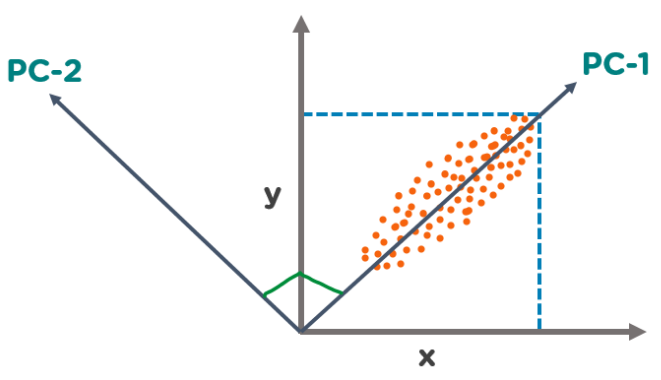

**Первый главный компонент (PC1)** — это направление в пространстве, вдоль которого точки данных имеют самую высокую или наибольшую дисперсию. Это линия, которая наилучшим образом представляет форму проецируемых точек. Чем больше изменчивость, зафиксированная в первом компоненте, тем больше информации сохраняется из исходного набора данных. Никакой иной главный компонент не может иметь более высокую изменчивость.

### Математическая постановка PCA и шаги по ее реализации

Допустим, что у нас есть признаковое пространство $X$ размерностью $n \times d$, где $n$ - количество объектов, $d$ - количество признаков.

Наша цель – найти новое пространство признаков меньшей размерности, в котором данные будут спроецированы таким образом, чтобы максимизировать дисперсию.

___

Важно отметить, что перед использованием PCA масштабирование признаков - это обязательный этап для корректных вычислений новых признаков. В этом случае лучше всего применять стандартизацию.

____

**1. Вычисление главных компонент**

Методом главных компонент последовательно находим следующие линейные комбинации признаков (компоненты) из $X_{new}$:
- каждая компонента ортогональна всем остальным и нормирована: $<w_i, w_j> = 0, \quad ||w_i||=1$;
- каждая компонента описывает максимально возможную дисперсию данных (с учётом предыдущего ограничения).

**Нахождение главных компонент происходит следующим образом:**
- Вычисляется ковариационная матрица для признаков.
Ковариация между двумя признаками $x_i$ и $x_j$ определяется, как
$$\text{Cov}(x_i, x_j) = \frac{1}{n} \sum_{k=1}^{n} (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j)$$
- Все ковариации между признаками можно представить в виде ковариационной матрицы:
$$\Sigma = \frac{1}{n} X_{new}^T X_{new}$$
где $\Sigma$ – матрица размерности $d \times d$, содержащая дисперсии на диагонали и ковариации за пределами диагонали.

**2. Вычисляются собственные значения и собственные векторы.**

Главные компоненты вычисляются с помощью разложения ковариационной матрицы:
$$\Sigma e = \lambda e$$
где $e$ – собственный вектор (направление новой оси), $\lambda$ – собственное значение (величина дисперсии вдоль этого направления).


**Собственные векторы представляют собой новые оси признакового пространства, а соответствующие им собственные значения – величину дисперсии вдоль этих осей.**

**3. Осуществляется работа с матрицей преобразования признаков.**

Сортируются собственные векторы по убыванию соответствующих собственных значений и оставляются первые $k$ компонент, которые объясняют наибольшую часть дисперсии.

В результате формируется матрица преобразования признаков $W$, в процессе создания которой используются соответствующие собственные векторы.
$$W = [е_1, е_2, ..., е_к]$$
Производится выбор количества главных компонент.
Как определить, сколько компонент $k$ оставить?

Объясненная дисперсия каждой компоненты вычисляется так:
$$\frac{\lambda_i}{\sum_{j=1}^{d} \lambda_i}$$

Суммарная доля объясненной дисперсии первых $k$ компонент составляет:
$$\sum_{i=1}^{k} \frac{\lambda_i}{\sum_{j=1}^{d} \lambda_i}$$

Часто используют метод "локтя" (elbow method), чтобы определить оптимальное число компонент. Для этого выбирают $k$, после которого добавление новых компонент незначительно увеличивает объясненную дисперсию.

Осуществляется уменьшение размерности и создание новых признаков.

Умножаем исходные стандартизированные данные $X_{new}$ на матрицу преобразования признаков $W$, чтобы получить сокращенные данные в $k$-мерном пространстве:
$$X_{уменьшенный} = X_{new} * W$$

In [ ]:
import numpy as np

# Пример данных
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 4, 3, 2, 1])

# Ковариация
cov_matrix = np.cov(x, y)
print("Ковариация:")
print(cov_matrix)

# Корреляция
correlation = np.corrcoef(x, y)
print("\nКорреляция:")
print(correlation)

Ковариация:
[[ 2.5 -2.5]
 [-2.5  2.5]]

Корреляция:
[[ 1. -1.]
 [-1.  1.]]


In [4]:
import numpy as np

# Генерируем случайные данные (100 объектов, 5 признаков)
np.random.seed(42)
X = np.random.rand(100, 5)

In [5]:
# Вычисляем среднее и стандартное отклонение для каждого признака
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Центрируем и масштабируем данные
X_standardized = (X - mean_X) / std_X

In [6]:
# Ковариационная матрица (размерности d x d)
cov_matrix = np.cov(X_standardized, rowvar=False)
cov_matrix

array([[ 1.01010101, -0.15708572, -0.22572944,  0.08190445, -0.05635772],
       [-0.15708572,  1.01010101,  0.13503727, -0.03759957, -0.12662974],
       [-0.22572944,  0.13503727,  1.01010101, -0.13422024, -0.04025475],
       [ 0.08190445, -0.03759957, -0.13422024,  1.01010101,  0.23663229],
       [-0.05635772, -0.12662974, -0.04025475,  0.23663229,  1.01010101]])

In [7]:
# Собственные значения и собственные векторы
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Сортируем собственные векторы по убыванию собственных значений
idx = np.argsort(eigenvalues)[::-1]
# l = 2 4 6 3 -> 6 4 3 2
# e = 3 4 1 7 -> 1 4 7 3
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

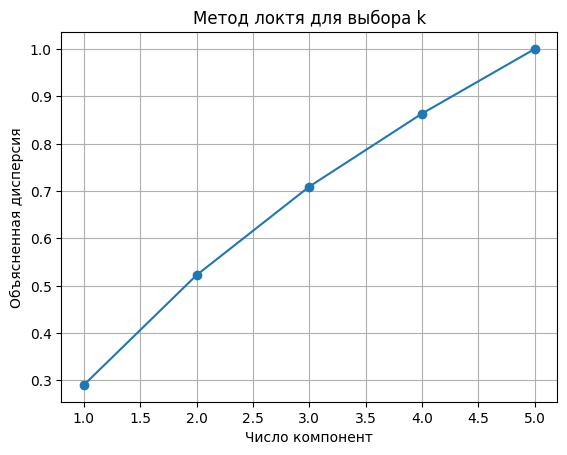

In [ ]:
import matplotlib.pyplot as plt

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# График метода локтя
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Число компонент')
plt.ylabel('Объясненная дисперсия')
plt.title('Метод локтя для выбора k')
plt.grid(True)
plt.show()

In [8]:
k = 2  # Оставляем 2 главные компоненты
W = eigenvectors[:, :k]  # Матрица преобразования (d x k)

# Умножаем исходные стандартизированные данные на W
X_reduced = X_standardized @ W
X_reduced[:4]

array([[-1.48584759,  0.10517099],
       [-0.09087782,  1.46554212],
       [-2.80234709,  0.29750159],
       [-0.54966191,  0.02257206]])

### Реализация PCA через SVD

Вместо ковариационной матрицы можно использовать сингулярное разложение (SVD):
$$X_{new} = U S V^T$$

где:
- $X_{new}$ – исходная стандартизированная матрица данных размерностью $n \times d$, где $n$ – число объектов, $d$ – число признаков;
- $U$ – ортонормальная матрица размерностью $n \times n$, содержащая левые сингулярные векторы, связанные с объектами;
- $S$ – диагональная матрица размерностью $n \times d$, содержащая сингулярные значения, которые аналогичны корням из собственных значений ковариационной матрицы. Они показывают, сколько дисперсии объясняет каждая главная компонента;
- $V^T$ – транспонированная ортонормальная матрица размерностью $d \times d$, содержащая правые сингулярные векторы. Они являются направляющими главных компонент.

Новые признаки $X_{уменьшенный}$​ получаются путем умножения исходных данных на первые $k$ столбцов из матрицы $V$, которые соответствуют наибольшим сингулярным значениям в $S$:
$$X_{уменьшенный} = X_{new} V_k$$​

где $V_k$​ – это первые $k$ столбцов из $V$, которые соответствуют наибольшим сингулярным значениям.
Сингулярное разложение работает быстрее и численно более устойчиво, поэтому многие библиотеки используют именно SVD.


In [ ]:
import numpy as np

# Стандартизация данных
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X_standardized = (X - mean_X) / std_X

# Выполнение сингулярного разложения
U, S, Vt = np.linalg.svd(X_standardized)

# Количество компонент, которые мы хотим оставить
k = 2  # например, 2 главные компоненты

# Матрица V_k (первые k столбцов матрицы V)
V_k = Vt.T[:, :k]  # транспонируем Vt, чтобы получить V, затем берем первые k столбцов

# Проекция данных на главные компоненты
X_reduced = X_standardized @ V_k  # умножаем на первые k компонент

print("Уменьшенные данные (PCA):")
X_reduced[:4]

Уменьшенные данные (PCA):


array([[-1.48584759,  0.10517099],
       [-0.09087782,  1.46554212],
       [-2.80234709,  0.29750159],
       [-0.54966191,  0.02257206]])

### Практическая реализация

In [ ]:
# установим библиотеку для работы с датасетами на kaggle
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od

# загрузим датасет напрямую с kaggle в Colab
dataset_url = 'https://www.kaggle.com/competitions/clustering-physical-activity-data/'

od.download(dataset_url)

Skipping, found downloaded files in "./clustering-physical-activity-data" (use force=True to force download)


In [ ]:
import pandas as pd

X = pd.read_csv('/content/clustering-physical-activity-data/Physical_Activity_Monitoring_unlabeled.csv')

X.shape

(534601, 53)

In [ ]:
imu_columns = [col for col in X.columns if 'Acc' in col \
               or 'Gyro' in col \
               or 'Magne' in col \
               or 'Temperature' in col \
               or 'Orientation' in col]

X[imu_columns] = X[imu_columns].interpolate(method='linear')

X.isna().sum().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_new = scaler.fit_transform(X)

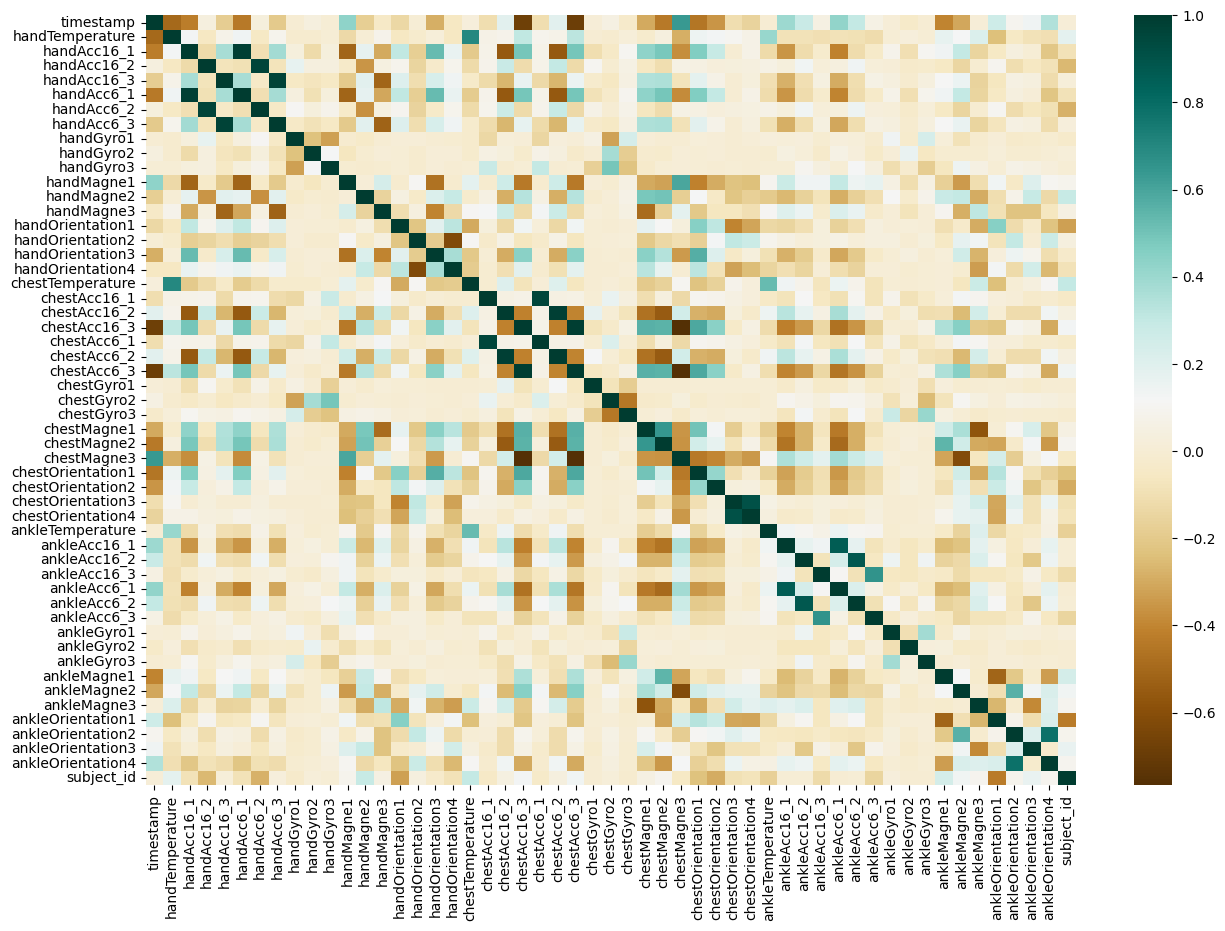

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = X_new.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_small = PCA(n_components=0.5)

# pca_small.fit(X_standardized)
pca_small.fit_transform(X_standardized)[:4]
# array([[-1.48584759,  0.10517099],
#        [-0.09087782,  1.46554212],
#        [-2.80234709,  0.29750159],
#        [-0.54966191,  0.02257206]])

array([[1.48584759, 0.10517099],
       [0.09087782, 1.46554212],
       [2.80234709, 0.29750159],
       [0.54966191, 0.02257206]])

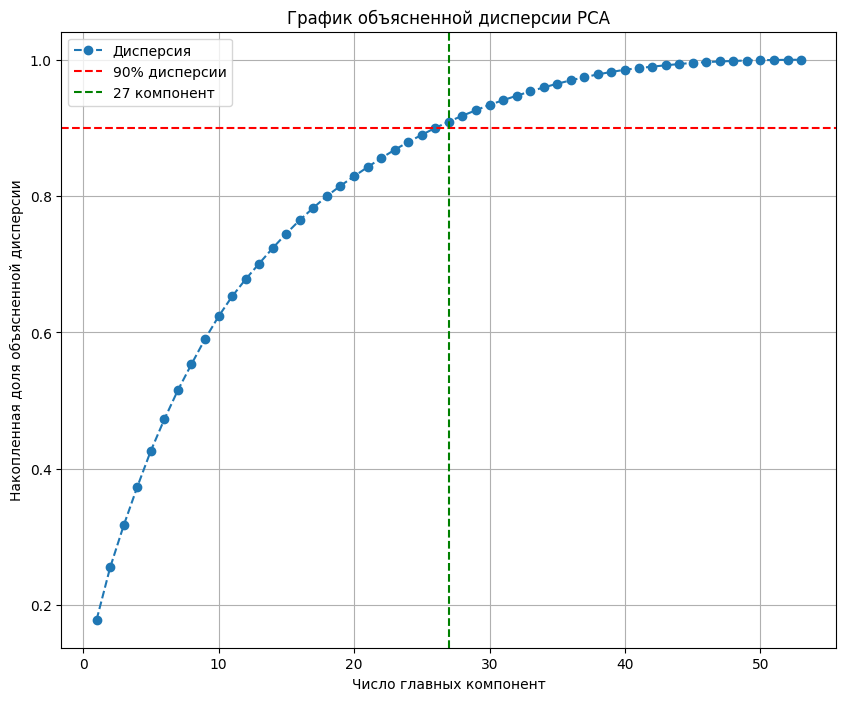

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_new)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label="Дисперсия")

# Добавляем горизонтальную линию на уровне 0.9
plt.axhline(y=0.9, color='r', linestyle='--', label="90% дисперсии")

# Добавляем вертикальную линию на X = 40
plt.axvline(x=27, color='g', linestyle='--', label="27 компонент")

plt.xlabel('Число главных компонент')
plt.ylabel('Накопленная доля объясненной дисперсии')
plt.title('График объясненной дисперсии PCA')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применяем PCA с уменьшением размерности до 2 компонент
pca = PCA(n_components=27)
X_pca = pca.fit_transform(X_new)

print("Форма данных после PCA:", X_pca.shape)

Форма данных после PCA: (534601, 27)


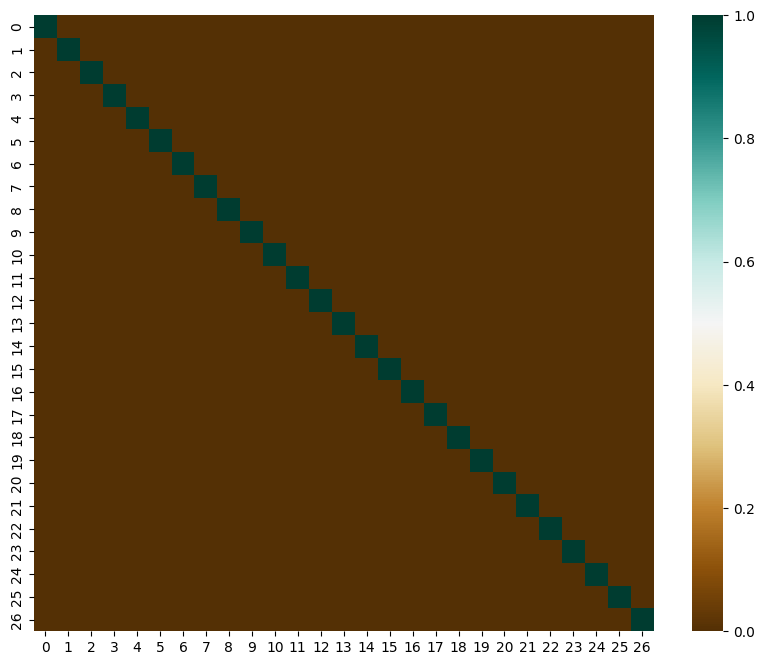

In [ ]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = pd.DataFrame(X_pca).corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [ ]:
pca = PCA(n_components=0.95)  # Оставляем компоненты, которые объясняют 95% дисперсии
X_pca = pca.fit_transform(X)

print("Число выбранных компонент:", pca.n_components_)

In [ ]:
# Применяем SVD
U, S, Vt = np.linalg.svd(X_new, full_matrices=False)

# Выбираем первые k компонент
k = 27  # Уменьшим до 27 измерений
X_pca_manual = X_new @ Vt[:k].T  # Умножаем на транспонированную часть

print("Форма данных после SVD:", X_pca_manual.shape)

### Линейный дискриминантный анализ (LDA)

Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis) — это метод уменьшения размерности, который используется для выделения признаков, наилучшим образом разделяющих классы. В отличие от PCA, который минимизирует потерю информации, LDA стремится максимизировать разделение классов.

LDA используется в основном в задачах классификации для уменьшения размерности признакового пространства.

**Главная идея LDA заключается в следующем:**
- Предположим, что у нас есть выборка из объектов, относящихся к $C$ классам, тогда LDA находит такие оси (проекции), которые:
    - максимизируют разброс между классами (осуществляется межклассовая дисперсия);
    - минимизируют разброс внутри классов (осуществляется внутриклассовая дисперсия);
    - обеспечивают наилучшее разделение классов в новом пространстве.


### Математическое обоснование LDA

Пусть у нас есть обучающая выборка из $n$ объектов со следующими $d$ признаками:
$$X = \{x_1, x_2, ..., x_N\}, \quad x_i \in \mathbb{R}^d$$
тогда каждый объект принадлежит одному из $C$ классов: $y_i \in {1, 2, ..., C}$.

**Центроиды классов**
Среднее значение (центроид) признаков для каждого класса:
$$m_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i$$

где $n_{k}$ — количество объектов класса $k$, $m_k$ — вектор среднего значения признаков для этого класса.
Общий центр всех данных:
 $$m = \frac{1}{N} \sum_{i=1}^{N} x_i$$

**Внутриклассовая матрица рассеяния (Scatter Matrix)**

Внутриклассовая матрица рассеяния показывает, насколько разнятся объекты внутри одного класса. Сумма ковариаций каждого класса вычисляется так:
$$S_W = \sum_{k=1}^{C} \sum_{x_i \in C_k} (x_i - m_k)(x_i - m_k)^T$$

**Межклассовая матрица рассеяния**

Межклассовая матрица рассеяния показывает, насколько классы отделены друг от друга в пространстве признаков:
$$S_B = \sum_{k=1}^{C} N_k (m_k - m)(m_k - m)^T$$
Чем больше $S_B$, тем дальше друг от друга расположены классы.

**Оптимизация проекции (Формула Фишера)**

LDA ищет матрицу проекции $W$, которая максимизирует отношение межклассовой дисперсии к внутриклассовой:
$$W = \arg\max \frac{|W^T S_B W|}{|W^T S_W W|}$$
Это сводится к решению обобщенной задачи на собственные значения:
$$S_W^{-1} S_B W = \lambda W$$
Колонками матрицы $W$ являются собственные векторы. Мы берем $k$ векторов с наибольшими собственными значениями, чтобы проецировать данные в новое пространство размерности $k$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Создаем тестовый набор данных
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, n_redundant=0, random_state=42)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

## Нелинейные методы

В предыдущем уроке мы рассмотрели линейные методы уменьшения размерности, такие как PCA (анализ главных компонент) и LDA (линейный дискриминантный анализ). Эти методы предполагают, что данные лежат в линейном подпространстве, однако это не всегда так.

Во многих задачах данные могут быть сложной нелинейной структуры, например, это могут быть:

- изображения, где пиксели связаны нелинейными зависимостями;
- генетические данные, имеющие сложные нелинейные зависимости между признаками;
- данные из датчиков или временные ряды, где зависимость между параметрами носит нелинейный характер.

В таких случаях линейные методы не смогут эффективно сжать данные, поскольку не смогут учесть сложные взаимосвязи.

Все вышеизложенное приводит к необходимости рассмотреть нелинейные методы уменьшения размерности, которые могут справляться со следующими задачами:
- t-SNE (t-Distributed Stochastic Neighbor Embedding);
- UMAP (Uniform Manifold Approximation and Projection).


### t-SNE

t-SNE преобразует данные таким образом, чтобы **сохранить вероятностное распределение расстояний** между объектами.

В исходном пространстве определяются вероятности $p_{ij}$, которые показывают, насколько объекты $x_i$ и $x_j$ близки друг к другу.

В пониженном пространстве (например, 2D) вычисляются аналогичные вероятности $q_{ij}$.

На следующем этапе настраивается новое представление точек таким образом, чтобы $p_{ij}$ и $q_{ij}$ были как можно ближе друг к другу.

В заключение используется дивергенция Кульбака-Лейблера для минимизации расхождений.

**Плюсы метода:**
- позволяет хорошо сохранять локальные структуры данных;
- подходит для визуализации сложных данных, таких как изображения или тексты;
- автоматически находит сложные нелинейные взаимосвязи.

**Минусы метода:**
- плохо сохраняет глобальные структуры (например, кластеры могут искажаться);
- является вычислительно затратным (медленно работает на больших данных);
- не позволяет эффективно применять трансформацию к новым данным.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Загружаем данные (рукописные цифры MNIST)
digits = load_digits()
X, y = digits.data, digits.target

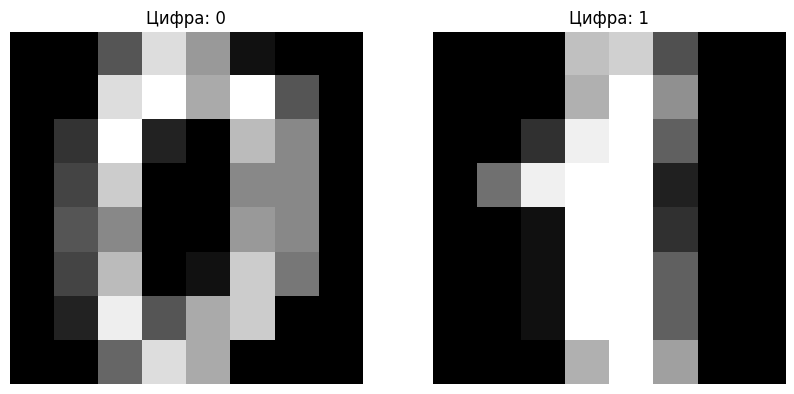

In [ ]:
digit_1 = X[0].reshape(8, 8)  # Первый образец, преобразуем в 8x8
digit_2 = X[1].reshape(8, 8)  # Второй образец

# Визуализируем пару цифр
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Первый подграфик
ax[0].imshow(digit_1, cmap='gray')
ax[0].set_title(f'Цифра: {y[0]}')
ax[0].axis('off')  # Отключаем оси

# Второй подграфик
ax[1].imshow(digit_2, cmap='gray')
ax[1].set_title(f'Цифра: {y[1]}')
ax[1].axis('off')  # Отключаем оси

plt.show()

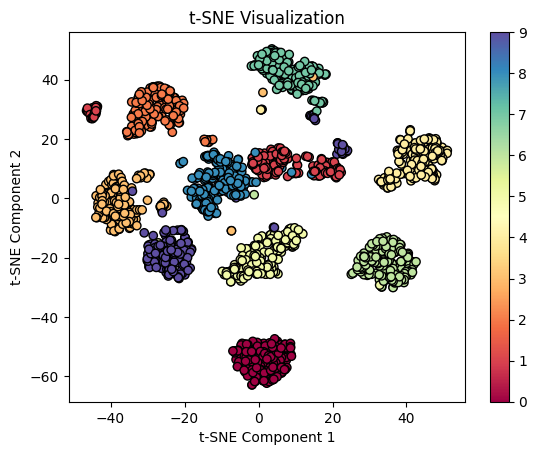

In [ ]:
# Применяем t-SNE для уменьшения размерности до 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализация
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', edgecolors='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar()
plt.show()

<timed exec>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


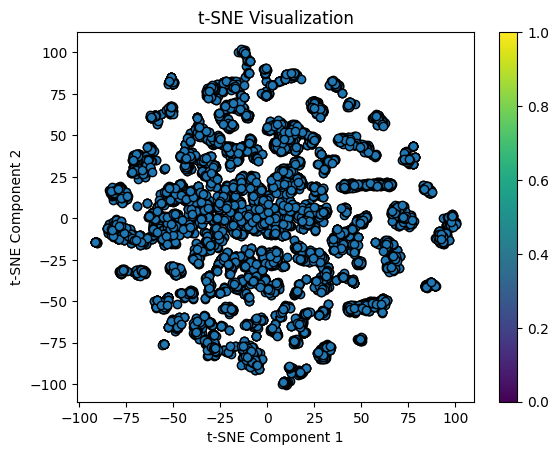

CPU times: user 2min 16s, sys: 215 ms, total: 2min 16s
Wall time: 2min 28s


In [ ]:
%%time
# Применяем t-SNE для уменьшения размерности до 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_new[:10000])

# Визуализация
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], cmap='Spectral', edgecolors='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.colorbar()
plt.show()

### UMAP

UMAP — более современный и быстрый метод по сравнению с t-SNE. При этом методе используется графовая интерпретация данных, а именно:
- Строится граф ближайших соседей. Точки соединяются ребрами, длина которых основана на вероятностной плотности. Веса рёбер определяются через радиус окрестности $\sigma$: $$p_{ij} = \exp(-||x_i - x_j|| / \sigma_i)$$
- Пониженное представление ищется с сохранением структуры графа. В пониженном пространстве строится новый граф с использованием аналогичной формулы.
- Оптимизация проводится методом кросс-энтропии, при котором минимизируется разница между двумя графами.
- Генерализуется структура данных и применяется трансформация к новым данным (в отличие от t-SNE).

**Плюсы метода:**
- работает быстрее t-SNE;
- сохраняет и локальную, и глобальную структуру данных;
может применяться к новым данным (в отличие от t-SNE);
- подходит для больших объемов данных.

**Минусы метода:**
- может не так хорошо сохранять детали локальной структуры, как t-SNE;
- требует тщательной настройки гиперпараметров.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


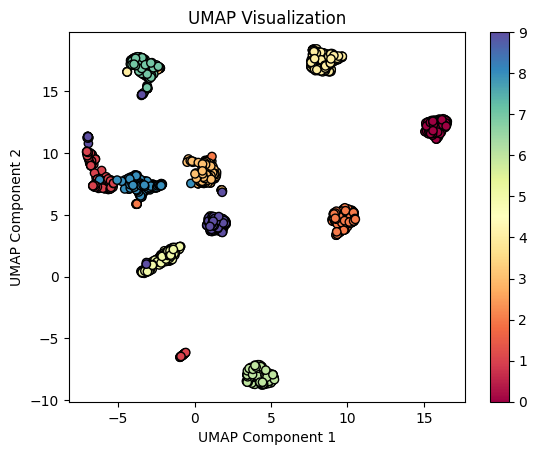

In [ ]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Загружаем данные (рукописные цифры)
digits = load_digits()
X, y = digits.data, digits.target

# Применяем UMAP для уменьшения размерности до 2D
umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Визуализация
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', edgecolors='k')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Visualization')
plt.colorbar()
plt.show()

## Методы на основе нейросетей

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

# Загружаем данные (цифры MNIST 8x8)
digits = load_digits()
X = digits.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Определяем автоэнкодер
input_dim = X_scaled.shape[1]  # Количество признаков (n, d)
encoding_dim = 10  # Размер уменьшенного пространства dim = dimensional

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer) # из d -> 10

decoded = Dense(input_dim, activation='sigmoid')(encoded) # 10 -> d

# Модель автоэнкодера
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Обучаем автоэнкодер
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Получаем "сжатые" признаки
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X_scaled)

print("Исходная размерность:", X_scaled.shape)
print("Размерность после автоэнкодера:", X_encoded.shape)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Исходная размерность: (1797, 64)
Размерность после автоэнкодера: (1797, 10)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

input_dim = X_new.shape[1]
encoding_dim = 10  # Размер уменьшенного пространства

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Модель автоэнкодера
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Обучаем автоэнкодер
autoencoder.fit(X_new, X_new, epochs=50, batch_size=16, shuffle=True, verbose=0)

# Получаем "сжатые" признаки
encoder = Model(input_layer, encoded)
X_encoded = encoder.predict(X_new)

print("Исходная размерность:", X_new.shape)
print("Размерность после автоэнкодера:", X_encoded.shape)

16707/16707 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
Исходная размерность: (534601, 53)
Размерность после автоэнкодера: (534601, 10)


In [ ]:
# Глубокий автоэнкодер
input_layer = Input(shape=(input_dim,))

# Этап сжатия (энкодер с несколькими слоями)
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Этап восстановления (декодер с несколькими слоями)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Модель автоэнкодера
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')